Matplotlib is building the font cache; this may take a moment.


ModuleNotFoundError: No module named 'folium'

In [2]:
!pip install folium
!pip install seaborn
!pip install matplotlib


   -------------------- ------------------- 1/2 [folium]
   -------------------- ------------------- 1/2 [folium]
   -------------------- ------------------- 1/2 [folium]
   -------------------- ------------------- 1/2 [folium]
   -------------------- ------------------- 1/2 [folium]
   -------------------- ------------------- 1/2 [folium]
   -------------------- ------------------- 1/2 [folium]
   -------------------- ------------------- 1/2 [folium]
   -------------------- ------------------- 1/2 [folium]
   ---------------------------------------- 2/2 [folium]




Primeras filas del dataset:
    Latitude  Longitude Sample Date  Total Alkalinity  Electrical Conductance  \
0 -28.760833  17.730278  2011-01-02           128.912                   555.0   
1 -26.861111  28.884722  2011-01-03            74.720                   162.9   
2 -26.450000  28.085833  2011-01-03            89.254                   573.0   
3 -27.671111  27.236944  2011-01-03            82.000                   203.6   
4 -27.356667  27.286389  2011-01-03            56.100                   145.1   

   Dissolved Reactive Phosphorus  
0                           10.0  
1                          163.0  
2                           80.0  
3                          101.0  
4                          151.0  

Información general:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9319 entries, 0 to 9318
Data columns (total 6 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Latitud

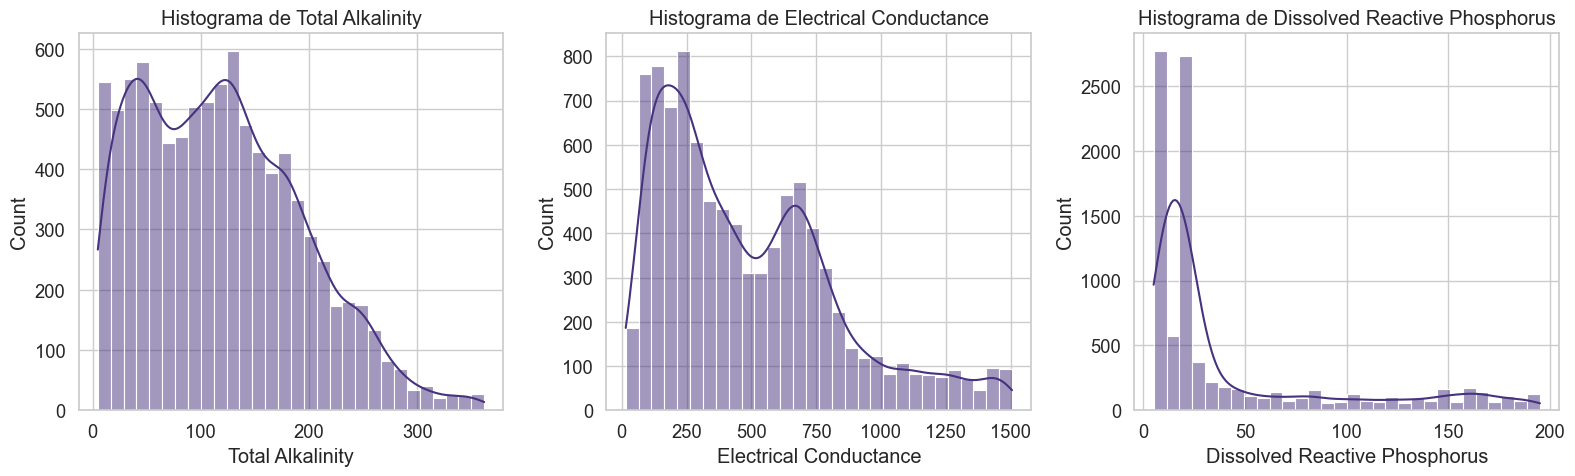

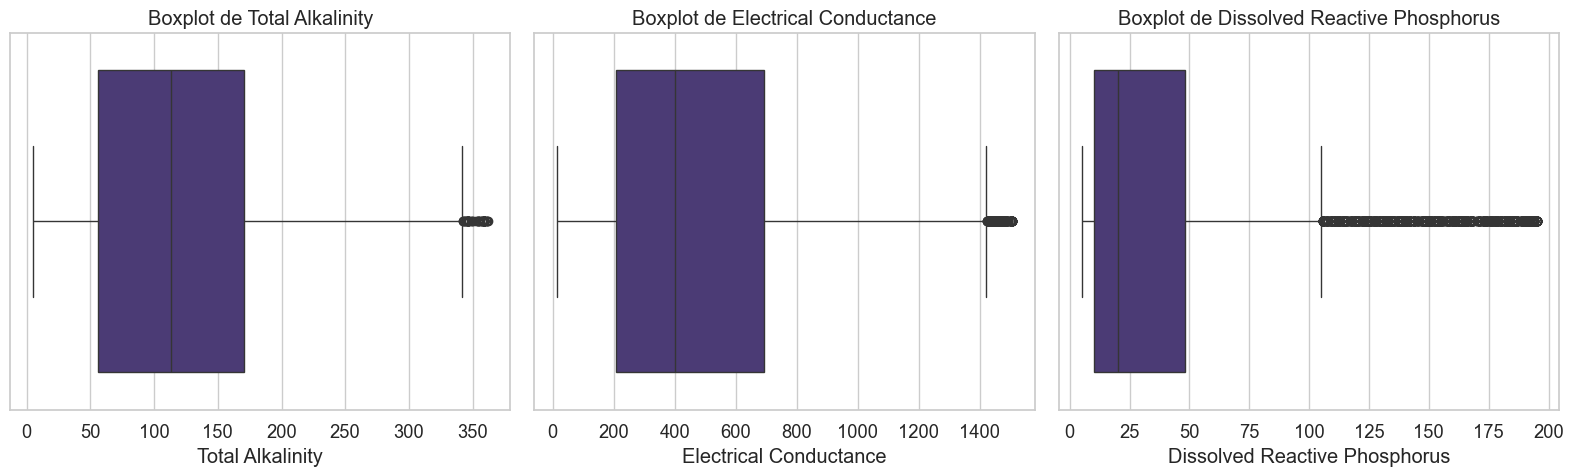


Matriz de correlación:
                               Total Alkalinity  Electrical Conductance  \
Total Alkalinity                       1.000000                0.692436   
Electrical Conductance                 0.692436                1.000000   
Dissolved Reactive Phosphorus          0.316777                0.279405   

                               Dissolved Reactive Phosphorus  
Total Alkalinity                                    0.316777  
Electrical Conductance                              0.279405  
Dissolved Reactive Phosphorus                       1.000000  


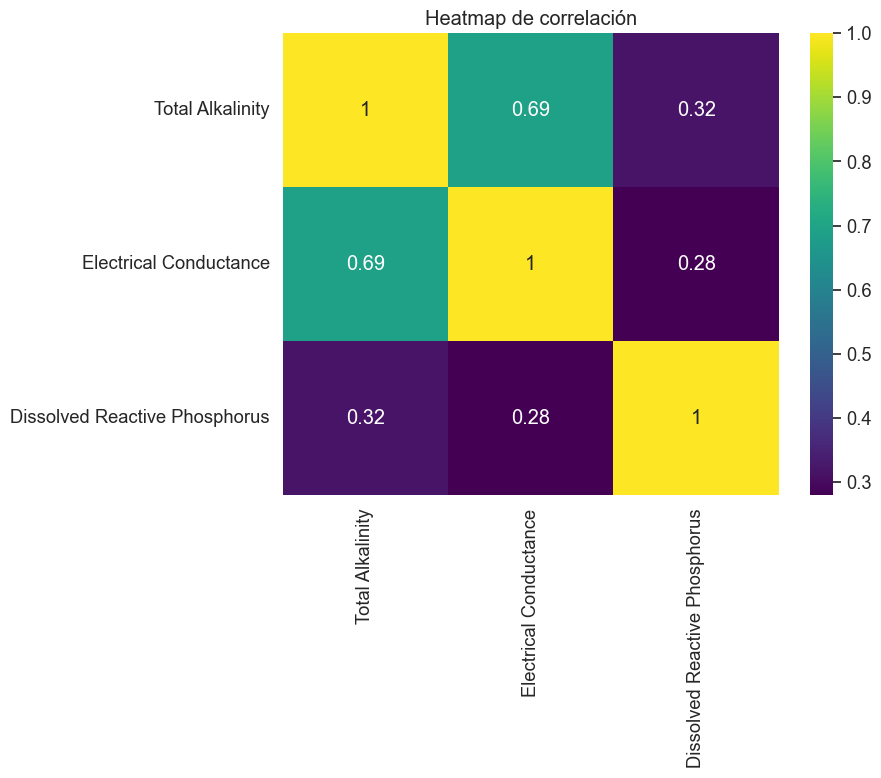

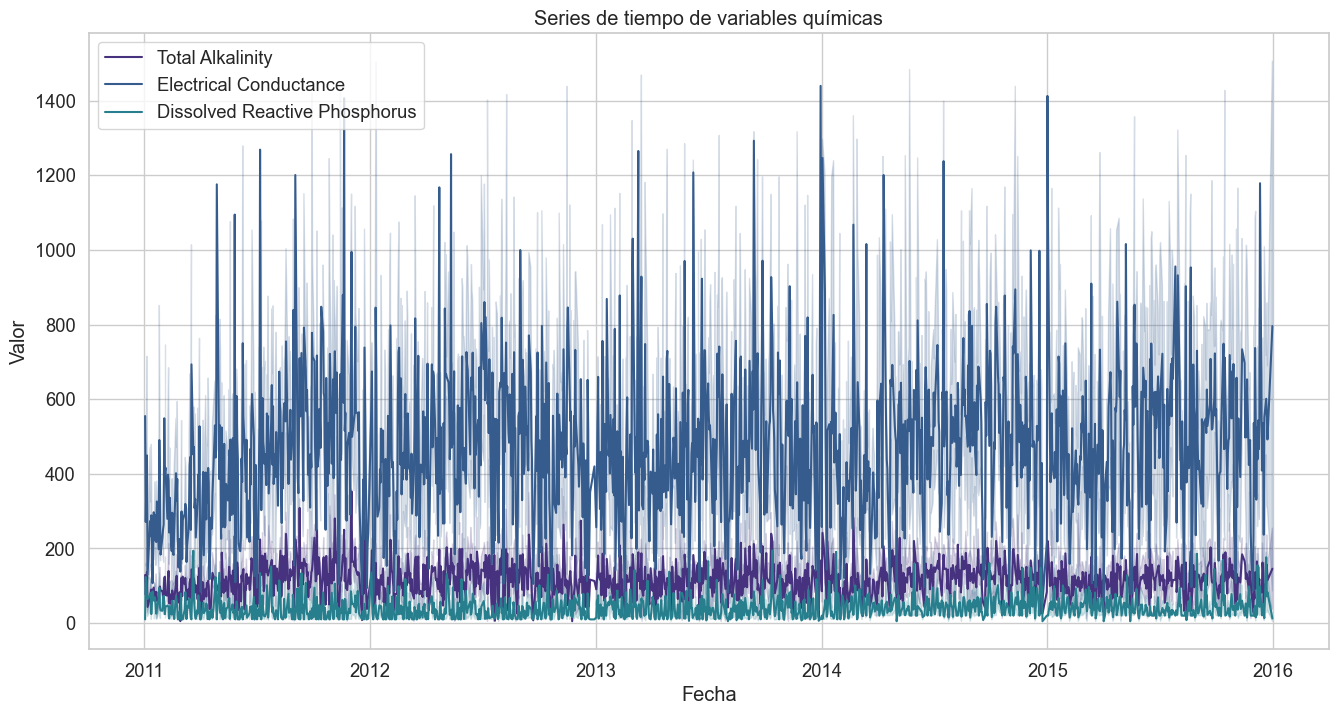


Mapa guardado como 'mapa_puntos.html'

Heatmap guardado como 'heatmap_conductividad.html'

Outliers detectados en Total Alkalinity: 43 valores
813     358.610
829     358.766
952     361.109
1004    359.101
1365    343.996
Name: Total Alkalinity, dtype: float64

Outliers detectados en Electrical Conductance: 169 valores
497     1448.0
720     1475.0
733     1482.0
771     1430.0
1091    1451.0
Name: Electrical Conductance, dtype: float64

Outliers detectados en Dissolved Reactive Phosphorus: 1398 valores
1    163.0
4    151.0
5    192.0
6    163.0
8    158.0
Name: Dissolved Reactive Phosphorus, dtype: float64

Resumen estadístico guardado como 'resumen_estadistico.csv'
Mapa guardado como 'mapa_calidad_conductividad.html'


In [4]:
# ============================================================
#   ANÁLISIS DESCRIPTIVO COMPLETO DE CALIDAD DE AGUA
# ============================================================

# --- 1. IMPORTACIÓN DE LIBRERÍAS ----------------------------

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap
from datetime import datetime

# Estilo visual
sns.set(style="whitegrid", palette="viridis", font_scale=1.2)

# --- 2. CARGAR EL DATASET ------------------------------------

df = pd.read_csv("C:/Users/DH898GW/Downloads/water_quality_training_dataset.csv")

# Convertir fecha
df["Sample Date"] = pd.to_datetime(df["Sample Date"], format="%d-%m-%Y", errors="coerce")

# Revisar primeras filas
print("\nPrimeras filas del dataset:")
print(df.head())

# --- 3. INFORMACIÓN GENERAL ----------------------------------

print("\nInformación general:")
print(df.info())

print("\nDescripción estadística:")
print(df.describe())

# --- 4. HISTOGRAMAS ------------------------------------------

variables = ["Total Alkalinity", "Electrical Conductance", "Dissolved Reactive Phosphorus"]

plt.figure(figsize=(16, 5))
for i, var in enumerate(variables, 1):
    plt.subplot(1, 3, i)
    sns.histplot(df[var], bins=30, kde=True)
    plt.title(f"Histograma de {var}")
plt.tight_layout()
plt.show()

# --- 5. BOXPLOTS (detección visual de outliers) ---------------

plt.figure(figsize=(16, 5))
for i, var in enumerate(variables, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(x=df[var])
    plt.title(f"Boxplot de {var}")
plt.tight_layout()
plt.show()

# --- 6. MATRIZ DE CORRELACIÓN Y HEATMAP -----------------------

corr = df[variables].corr()
print("\nMatriz de correlación:")
print(corr)

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap="viridis")
plt.title("Heatmap de correlación")
plt.show()

# --- 7. SERIES TEMPORALES -------------------------------------

plt.figure(figsize=(16, 8))
for var in variables:
    sns.lineplot(data=df.sort_values("Sample Date"), x="Sample Date", y=var, label=var)

plt.title("Series de tiempo de variables químicas")
plt.xlabel("Fecha")
plt.ylabel("Valor")
plt.legend()
plt.show()

# --- 8. MAPA GEOGRÁFICO BÁSICO --------------------------------

# Punto central aproximado
lat_mean = df["Latitude"].mean()
lon_mean = df["Longitude"].mean()

m = folium.Map(location=[lat_mean, lon_mean], zoom_start=6)

# Agregar puntos
for _, row in df.iterrows():
    folium.CircleMarker(
        location=(row["Latitude"], row["Longitude"]),
        radius=3,
        color="blue",
        fill=True,
        fill_opacity=0.6
    ).add_to(m)

m.save("mapa_puntos.html")
print("\nMapa guardado como 'mapa_puntos.html'")

# --- 9. HEATMAP (conductividad) -------------------------------

heat_df = df[["Latitude", "Longitude", "Electrical Conductance"]].dropna()

m_heat = folium.Map(location=[lat_mean, lon_mean], zoom_start=6)
HeatMap(
    data=heat_df[["Latitude", "Longitude", "Electrical Conductance"]].values,
    radius=12,
    blur=15,
    max_zoom=1,
).add_to(m_heat)

m_heat.save("heatmap_conductividad.html")
print("\nHeatmap guardado como 'heatmap_conductividad.html'")

# --- 10. DETECCIÓN DE OUTLIERS (Método IQR) -------------------

def detectar_outliers(col):
    Q1, Q3 = col.quantile(0.25), col.quantile(0.75)
    IQR = Q3 - Q1
    lim_inf = Q1 - 1.5 * IQR
    lim_sup = Q3 + 1.5 * IQR
    outliers = col[(col < lim_inf) | (col > lim_sup)]
    return outliers

for var in variables:
    out = detectar_outliers(df[var])
    print(f"\nOutliers detectados en {var}: {len(out)} valores")
    print(out.head())

# --- 11. GUARDAR RESUMEN --------------------------------------

df.describe().to_csv("resumen_estadistico.csv")
print("\nResumen estadístico guardado como 'resumen_estadistico.csv'")

# ============================================================
# MAPA DE CALIDAD DEL AGUA BASADO EN CONDUCTIVIDAD ELÉCTRICA
# ============================================================

import pandas as pd
import folium

# --- 1. Cargar dataset --------------------------------------

df = pd.read_csv("water_quality_training_dataset.csv")
df["Sample Date"] = pd.to_datetime(df["Sample Date"], format="%d-%m-%Y", errors="coerce")

# --- 2. Función de colores según calidad del agua ------------

def color_por_conductividad(value):
    """
    Escala cualitativa simple:
    <250     = Buena calidad (verde)
    250–500  = Media (amarillo)
    500–1000 = Baja (naranja)
    >1000    = Muy mala (rojo)
    """
    if value < 250:
        return "green"
    elif value < 500:
        return "yellow"
    elif value < 1000:
        return "orange"
    else:
        return "red"

# --- 3. Crear mapa centrado en la zona de estudio ------------

lat_center = df["Latitude"].mean()
lon_center = df["Longitude"].mean()

m = folium.Map(location=[lat_center, lon_center], zoom_start=6)

# --- 4. Agregar puntos coloreados por valor de conductividad -

for _, row in df.iterrows():
    valor = row["Electrical Conductance"]
    color = color_por_conductividad(valor)

    folium.CircleMarker(
        location=[row["Latitude"], row["Longitude"]],
        radius=5,
        color=color,
        fill=True,
        fill_color=color,
        fill_opacity=0.8,
        popup=(
            f"<b>Conductividad:</b> {valor} µS/cm<br>"
            f"<b>Alcalinidad:</b> {row['Total Alkalinity']} mg/L<br>"
            f"<b>Fósforo:</b> {row['Dissolved Reactive Phosphorus']} µg/L<br>"
            f"<b>Fecha:</b> {row['Sample Date'].date()}"
        )
    ).add_to(m)

# --- 5. Agregar leyenda --------------------------------------

legend_html = """
<div style="
    position: fixed; 
    bottom: 30px; left: 30px; width: 220px; height: 160px; 
    background-color: white; z-index:9999; 
    font-size:14px; border:2px solid grey; border-radius:8px; padding:10px;">
<b>Calidad del Agua<br>(Conductividad)</b><br>
<i style="background:green; width:10px; height:10px; display:inline-block;"></i> Buena (&lt;250)<br>
<i style="background:yellow; width:10px; height:10px; display:inline-block;"></i> Media (250–500)<br>
<i style="background:orange; width:10px; height:10px; display:inline-block;"></i> Baja (500–1000)<br>
<i style="background:red; width:10px; height:10px; display:inline-block;"></i> Muy Mala (&gt;1000)<br>
</div>
"""

m.get_root().html.add_child(folium.Element(legend_html))

# --- 6. Guardar mapa -----------------------------------------

m.save("mapa_calidad_conductividad.html")
print("Mapa guardado como 'mapa_calidad_conductividad.html'")

# ============================================================
# FIN DEL SCRIPT
# ============================================================

# ============================================================
#             FIN DEL SCRIPT DE ANÁLISIS
# ============================================================